In [210]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../resource/result/data_with_metrics.csv')
df.head()


,commit_id,changed_src_files,categories,complexity,lloc
0,fb4272aab89ee73645392850c441b5df8b5f4c49,platforms/spring-boot/components-starter/camel...,1,176,540
1,fb4272aab89ee73645392850c441b5df8b5f4c49,platforms/spring-boot/components-starter/camel...,1,170,522
2,20db898ea83bf8d2b0640abf5e04ed5e347f1c05,components/camel-jms/src/main/java/org/apache/...,2,148,478
3,20db898ea83bf8d2b0640abf5e04ed5e347f1c05,platforms/spring-boot/components-starter/camel...,1,168,516
4,409529fd3f60d2978d86927b062f551aa55066d7,core/camel-main/src/main/java/org/apache/camel...,4,200,721


In [190]:
grouped_df = df.groupby("commit_id").agg({
    "changed_src_files": lambda x: list(x),  # 'changed_src_files'をリストにまとめる
    "categories": lambda x: list(x),         # 'categories'をリストにまとめる
    "complexity": "sum",          # 'complexity'の合計を求める
    "lloc": "sum"                 # 'lloc'の合計を求める
}).reset_index()
grouped_df.head()

,commit_id,changed_src_files,categories,complexity,lloc
0,0000e4462e7343152ee0f6730fc8e50e8810b7f4,[camel-core/src/main/java/org/apache/camel/imp...,"[4, 2]",21,67
1,00026ef1b16b51145c44200099f110dea62b5464,[components/camel-docker/src/main/java/org/apa...,"[3, 4]",20,68
2,000775ffae617e61ee57901d26c8dfb607809ab6,[components/camel-pulsar/src/main/java/org/apa...,"[2, 1, 1]",15,74
3,00077a0aa1eff2ca38f457d8ecc75cbe8918db0f,[components/camel-cxf-transport/src/main/java/...,[4],27,127
4,000938a9e22a4b214db8a6b79fc5564e060442b1,[components/camel-sjms/src/main/java/org/apach...,[4],30,143


In [191]:
label_df = pd.read_csv("../../../../sample_data/label_dataset/data/camel.csv")
label_df.head()

C:\Users\masak\AppData\Local\Temp\ipykernel_7648\577005120.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  label_df = pd.read_csv("../../../../sample_data/label_dataset/data/camel.csv")


,commit_hash,author_name,author_date_unix_timestamp,author_email,author_date,commit_message,fix,classification,linked,contains_bug,...,nuc,exp,rexp,sexp,glm_probability,rf_probability,repository_id,issue_id,issue_date,issue_type
0,179b7ece6358193accd5759d5e307574b395a37d,Andrea Cosentino,1574777724,ancosen@gmail.com,Tue Nov 26 15:15:24 2019 +0100,Upgrade Xchange to version 4.4.1,False,NaN,False,False,...,1.0,7512.0,235.300275,3277.0,0.003592,0.032,434e44f4-f465-4fef-b0d6-41fd5ad2e50d,NaN,NaN,NaN
1,e2d6c518df53fa0d06a7d308acff377993e80278,aldettinger,1574776857,aldettinger@gmail.com,Tue Nov 26 15:00:57 2019 +0100,CAMEL-11807: Migrated camel-jsonpath tests to ...,False,Preventative,False,False,...,3.0,232.0,7.524554,170.0,0.932858,0.332,434e44f4-f465-4fef-b0d6-41fd5ad2e50d,NaN,NaN,NaN
2,72bc6b0783cca7197f98911c2e88506789e0b960,Andrea Cosentino,1574773034,ancosen@gmail.com,Tue Nov 26 13:57:14 2019 +0100,Upgrade Brave Zipkin to version 5.9.1,False,NaN,False,False,...,1.0,7511.0,235.209607,3276.0,0.003592,0.032,434e44f4-f465-4fef-b0d6-41fd5ad2e50d,NaN,NaN,NaN
3,630f1b90c8b007b62b514f579a2b3fca74fbc5d2,Andrea Cosentino,1574768649,ancosen@gmail.com,Tue Nov 26 12:44:09 2019 +0100,Upgrade Jandex to version 2.1.2.Final,False,NaN,False,False,...,1.0,7510.0,237.061279,3275.0,0.003588,0.032,434e44f4-f465-4fef-b0d6-41fd5ad2e50d,NaN,NaN,NaN
4,574012e334254dd94673745e44247a6e42361760,Colm O hEigeartaigh,1574767376,coheigea@apache.org,Tue Nov 26 11:22:56 2019 +0000,Updating Pax url version,False,NaN,False,False,...,1.0,161.0,17.907580,4.0,0.377834,0.028,434e44f4-f465-4fef-b0d6-41fd5ad2e50d,NaN,NaN,NaN


In [192]:
commits = label_df.shape[0]
bug_commits = label_df[label_df["contains_bug"]]
bug_commits.shape[0] / commits

0.2403391167192429

In [194]:
df2 = pd.merge(grouped_df[["commit_id", "changed_src_files", "categories", "complexity", "lloc"]], label_df[["commit_hash", "contains_bug", "fixes"]], how="inner", left_on="commit_id", right_on="commit_hash")
df2 = df2.drop(columns=["commit_hash"])
df2.head()

,commit_id,changed_src_files,categories,complexity,lloc,contains_bug,fixes
0,0000e4462e7343152ee0f6730fc8e50e8810b7f4,[camel-core/src/main/java/org/apache/camel/imp...,"[4, 2]",21,67,False,NaN
1,00026ef1b16b51145c44200099f110dea62b5464,[components/camel-docker/src/main/java/org/apa...,"[3, 4]",20,68,False,NaN
2,000775ffae617e61ee57901d26c8dfb607809ab6,[components/camel-pulsar/src/main/java/org/apa...,"[2, 1, 1]",15,74,False,NaN
3,00077a0aa1eff2ca38f457d8ecc75cbe8918db0f,[components/camel-cxf-transport/src/main/java/...,[4],27,127,False,NaN
4,000938a9e22a4b214db8a6b79fc5564e060442b1,[components/camel-sjms/src/main/java/org/apach...,[4],30,143,False,NaN


In [195]:
df2.shape

(20002, 7)

In [196]:
# 集計
df2["num_product_files"] = df2["categories"].apply(len)
length_counts = df2["num_product_files"].value_counts().reset_index()
length_counts = length_counts.sort_values(by="num_product_files", ascending=True)
length_counts.head(10)

,num_product_files,count
0,1,9152
1,2,3766
2,3,2210
3,4,1209
4,5,794
5,6,558
6,7,443
7,8,291
8,9,243
9,10,175


In [197]:
length_counts["cumulative_count"] = length_counts["count"].cumsum()
total_count = length_counts["count"].sum()

threshold = total_count * 0.90

result = length_counts[length_counts["cumulative_count"] >= threshold].iloc[0]["num_product_files"]
print("90%に達する num_product_files:", result)

90%に達する num_product_files: 7


In [198]:
df2.head()

,commit_id,changed_src_files,categories,complexity,lloc,contains_bug,fixes,num_product_files
0,0000e4462e7343152ee0f6730fc8e50e8810b7f4,[camel-core/src/main/java/org/apache/camel/imp...,"[4, 2]",21,67,False,NaN,2
1,00026ef1b16b51145c44200099f110dea62b5464,[components/camel-docker/src/main/java/org/apa...,"[3, 4]",20,68,False,NaN,2
2,000775ffae617e61ee57901d26c8dfb607809ab6,[components/camel-pulsar/src/main/java/org/apa...,"[2, 1, 1]",15,74,False,NaN,3
3,00077a0aa1eff2ca38f457d8ecc75cbe8918db0f,[components/camel-cxf-transport/src/main/java/...,[4],27,127,False,NaN,1
4,000938a9e22a4b214db8a6b79fc5564e060442b1,[components/camel-sjms/src/main/java/org/apach...,[4],30,143,False,NaN,1


In [199]:
df3 = df2[df2["num_product_files"] <= result]
df3.shape

(18132, 8)

In [200]:
df3.loc[: ,"max_level"] = df3["categories"].apply(lambda x: max(x))

C:\Users\masak\AppData\Local\Temp\ipykernel_7648\1024438032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[: ,"max_level"] = df3["categories"].apply(lambda x: max(x))


In [201]:
bug_commits = df3["contains_bug"].value_counts().get(True, 0)
bug_commits

6732

In [202]:
bug_ratio = bug_commits / df3.shape[0]
bug_ratio

0.37127729980145596

In [203]:
df3

,commit_id,changed_src_files,categories,complexity,lloc,contains_bug,fixes,num_product_files,max_level
0,0000e4462e7343152ee0f6730fc8e50e8810b7f4,[camel-core/src/main/java/org/apache/camel/imp...,"[4, 2]",21,67,False,NaN,2,4
1,00026ef1b16b51145c44200099f110dea62b5464,[components/camel-docker/src/main/java/org/apa...,"[3, 4]",20,68,False,NaN,2,4
2,000775ffae617e61ee57901d26c8dfb607809ab6,[components/camel-pulsar/src/main/java/org/apa...,"[2, 1, 1]",15,74,False,NaN,3,2
3,00077a0aa1eff2ca38f457d8ecc75cbe8918db0f,[components/camel-cxf-transport/src/main/java/...,[4],27,127,False,NaN,1,4
4,000938a9e22a4b214db8a6b79fc5564e060442b1,[components/camel-sjms/src/main/java/org/apach...,[4],30,143,False,NaN,1,4
...,...,...,...,...,...,...,...,...,...
19997,fff38e1f1b4589fa7ca2e39ea3c0e889bb6bf620,[components/camel-ahc/src/main/java/org/apache...,"[4, 4, 4]",85,307,False,NaN,3,4
19998,fff684504d3a602f6a63035b3fc200e7950708bd,[components/camel-mail/src/main/java/org/apach...,"[4, 4]",94,298,True,"[""c1398922a8af229c1b27ae5d7048d897a1318a25"", ""...",2,4
19999,fffafeb9f429b7e3a69f47d427d03a8f9344f84d,[camel-core/src/main/java/org/apache/camel/imp...,[3],74,226,False,NaN,1,3
20000,fffd1393bda6bbc01b43514f6fde2279829a9b0d,[components/camel-cxf/src/main/java/org/apache...,[4],41,166,False,NaN,1,4


In [209]:
for i in range(1, 5):
    bug_commits = df3[df3["max_level"]==i]["contains_bug"].value_counts().get(True, 0)
    per_level_commits = len(df3[df3["max_level"]==i])
    ratio = bug_commits / per_level_commits
    print(f"レベル{str(i)}, コミット数：{per_level_commits}, バグコミット数：{bug_commits}, バグ率：{ratio}")


レベル1, コミット数：2967, バグコミット数：958, バグ率：0.3228850690933603
レベル2, コミット数：5017, バグコミット数：1392, バグ率：0.2774566473988439
レベル3, コミット数：1201, バグコミット数：566, バグ率：0.47127393838467946
レベル4, コミット数：8947, バグコミット数：3816, バグ率：0.42651167989270145


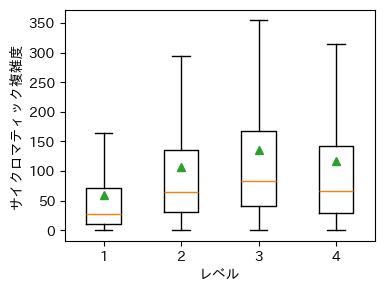

In [207]:
import matplotlib.pyplot as plt
import japanize_matplotlib  # 日本語フォントのサポートを簡単に設定できるライブラリ
import numpy as np

# データフレーム（df）の準備
categories = sorted(df3['max_level'].unique())
category_indices = {category: idx for idx, category in enumerate(categories)}
category_data = {category: df3[df3['max_level'] == category]['complexity'].values for category in categories}

# 箱ひげ図の作成
fig, ax = plt.subplots(figsize=(4, 3))

# データをプロット
ax.boxplot([category_data[category] for category in categories], vert=True, patch_artist=False, showmeans=True, sym="")

# タイトル、ラベル、X軸のラベルを設定
# ax.set_title('Category-wise Complexity Distribution')
ax.set_xlabel('レベル')
ax.set_ylabel('サイクロマティック複雑度')
ax.set_xticklabels(categories)

# グラフの表示
plt.show()

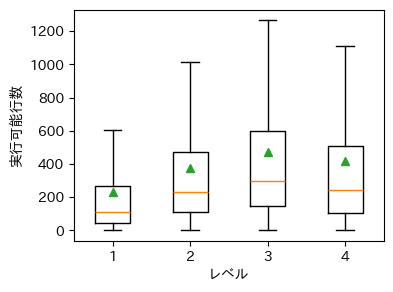

In [208]:
import matplotlib.pyplot as plt
import japanize_matplotlib  # 日本語フォントのサポートを簡単に設定できるライブラリ
import numpy as np

# データフレーム（df）の準備
categories = sorted(df3['max_level'].unique())
category_indices = {category: idx for idx, category in enumerate(categories)}
category_data = {category: df3[df3['max_level'] == category]['lloc'].values for category in categories}

# 箱ひげ図の作成
fig, ax = plt.subplots(figsize=(4, 3))

# データをプロット
ax.boxplot([category_data[category] for category in categories], vert=True, patch_artist=False, showmeans=True, sym="")

# タイトル、ラベル、X軸のラベルを設定
# ax.set_title('Category-wise Complexity Distribution')
ax.set_xlabel('レベル')
ax.set_ylabel('実行可能行数')
ax.set_xticklabels(categories)

# グラフの表示
plt.show()